In [2]:
%pip install nltk
# Importing libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Note: you may need to restart the kernel to use updated packages.


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sivakarthick/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import nltk
nltk.download('stopwords', download_dir="/Users/sivakarthick/HUB/AmazonReviews")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sivakarthick/HUB/AmazonReviews...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
nltk.data.path.append("/Users/sivakarthick/HUB/AmazonReviews")
stop_words = set(stopwords.words('english'))

In [6]:
df = pd.read_csv("Reviews.csv") 


In [7]:
# Basic info
print(df.head())  
print('\n')
print(df.info())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [8]:
# Selecting only relevant columns
df = df[['Text', 'Score']]

In [9]:
#Ratings to binary sentiment labels:
# Score 4, 5 -> Positive (1), Score 1, 2, 3 -> Negative (0)
df['Sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

In [10]:
def preprocess_text(t):
    t = t.lower() 
    t = re.sub(r'\d+', '', t)  
    t = t.translate(str.maketrans('', '', string.punctuation))  
    t = t.strip()
    words = t.split()
    words = [i for i in words if i not in stopwords.words('english')]
    return " ".join(words)

In [12]:
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

In [13]:
# Text into numerical form using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  
X = tfidf.fit_transform(df['Cleaned_Text']).toarray()
y = df['Sentiment']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
y_pred = model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.58      0.68      2316
           1       0.88      0.96      0.92      7684

    accuracy                           0.87     10000
   macro avg       0.85      0.77      0.80     10000
weighted avg       0.87      0.87      0.87     10000



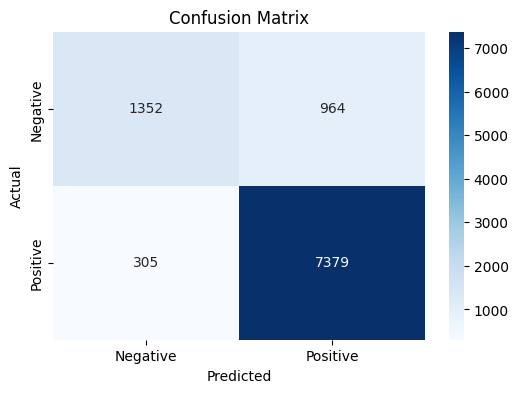

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
from joblib import dump

dump(model, "sentiment_model.joblib")
dump(tfidf, 'tfidf_vectorizer.joblib')
print("Model saved as 'sentiment_model.joblib'")

Model saved as 'sentiment_model.joblib'


In [20]:
new_reviews_df = pd.read_csv("Test.csv")  

print(new_reviews_df.columns)

review_column = "Text"    
product_id_col = "ProductId"  
user_id_col = "UserId"  

new_reviews_df["Cleaned_Review"] = new_reviews_df[review_column].apply(preprocess_text)

vectorized_reviews = tfidf.transform(new_reviews_df["Cleaned_Review"]).toarray()

predicted_sentiments = model.predict(vectorized_reviews)

new_reviews_df["Predicted_Sentiment"] = predicted_sentiments
new_reviews_df["Sentiment_Label"] = new_reviews_df["Predicted_Sentiment"].map({1: "Positive", 0: "Negative"})

output_df = new_reviews_df[[product_id_col, user_id_col, "Predicted_Sentiment", "Sentiment_Label"]]

output_df.to_csv("Result.csv", index=False)

print("Predictions are saved to 'Result.csv'!")

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
Predictions are saved to 'Result.csv'!
